# **Project ID : PRCP- 1001- RiceLeaf disease detection**


## About Dataset :
This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class:

  * Leaf smut

  * Brown spot
  
  * Bacterial leaf blight

We have used below link to load datasets
Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip



## Problem Statement:

Create a model to classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

## List Of Contents

- Importing Libraries
- Data Collection
- Plotting Images
- Image Augmentation
- Creating CNN architecture
- Model Training
- Model Evaluation
- Evaluation Summary
- Conclusion

## Importing Necessary Libraries

In [ ]:
# Basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# image processing libraries
import glob
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Collection

In [ ]:
# Defining folder path
directory ='/content/drive/MyDrive/Internship phase 3 CDS certification/Projects/Rice Leaf Disease using CNN/PRCP-1001-RiceLeaf/Data'

In [ ]:
# Gathering Images of different disease

Bacterial_leaf_blight = [directory + '/Bacterial leaf blight/' + img for img in os.listdir(directory + '/Bacterial leaf blight')]
Brown_spot = [directory + '/Brown spot/' + img for img in os.listdir(directory + '/Brown spot')]
Leaf_smut = [directory + '/Leaf smut/' + img for img in os.listdir(directory + '/Leaf smut')]

In [ ]:
type(Bacterial_leaf_blight)

list

## Plotting image

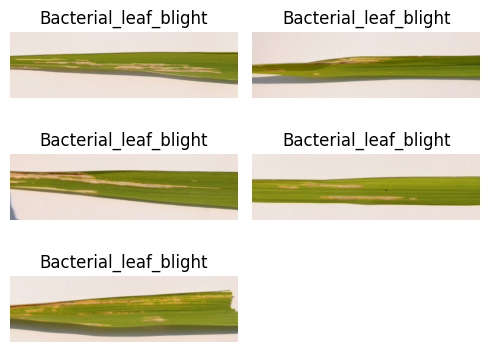

In [ ]:
plt.figure(figsize=(5,4))

for i in range(5):
  if i <5:
    plt.subplot(3,2,i+1)
    plt.imshow(Image.open(Bacterial_leaf_blight[i]))
    plt.title('Bacterial_leaf_blight')
    plt.axis('off')

plt.tight_layout()


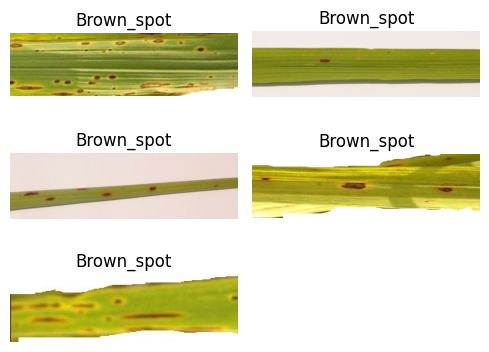

In [ ]:
plt.figure(figsize=(5,4))

for i in range(5):
  if i <5:
    plt.subplot(3,2,i+1)
    plt.imshow(Image.open(Brown_spot[i]))
    plt.title('Brown_spot')
    plt.axis('off')

plt.tight_layout()

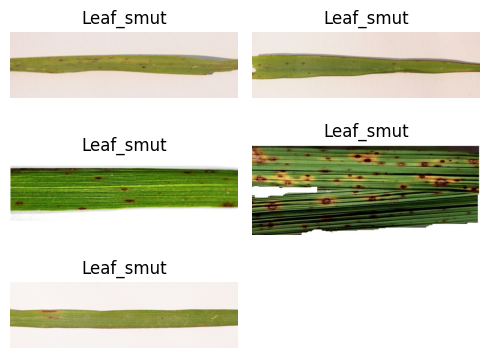

In [ ]:
plt.figure(figsize=(5,4))

for i in range(5):
  if i <5:
    plt.subplot(3,2,i+1)
    plt.imshow(Image.open(Leaf_smut[i]))
    plt.title('Leaf_smut')
    plt.axis('off')

plt.tight_layout()

## Image data augmentation and preprocessing

In [ ]:
# Use ImageDataGenerator library for image data augmentation and preprocessing of image data

Image_Data_Generator = ImageDataGenerator(
    rescale= 1.0/255,
    rotation_range=20,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    fill_mode = 'nearest',
    brightness_range=[0.5,1.2],
    horizontal_flip = True,
    vertical_flip=True,
    zoom_range=[0.5, 1],
    validation_split=0.2
)


## Creating training Datasets

In [ ]:
train_dataset = Image_Data_Generator.flow_from_directory(
    directory,
    target_size=(224,224),
    batch_size=20,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset= 'training',
    seed=73

)

Found 96 images belonging to 3 classes.


## Creating validation datasets

In [ ]:
validation_dataset = Image_Data_Generator.flow_from_directory(
    directory,
    target_size=(224,224),
    batch_size=20,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset= 'validation',
    seed = 73
)

Found 23 images belonging to 3 classes.


In [ ]:
# See class labels

train_dataset.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

## Model1 Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model1 = Sequential()

model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(3,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(3,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 186624)           

## Compiling the model

In [ ]:
model1.compile(optimizer='rmsprop',loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
# Use early stopping function to improve the generalization and efficiency of training deep learning models

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

## Training the model

In [ ]:
history1 = model1.fit(train_dataset,epochs=10,validation_data=validation_dataset,callbacks=early_stopping,verbose=1)

Epoch 1/10
5/5 [==============================] - 15s 3s/step - loss: 1.0988 - accuracy: 0.2917 - val_loss: 1.0986 - val_accuracy: 0.3043
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 1.0988 - accuracy: 0.2292 - val_loss: 1.0986 - val_accuracy: 0.3043
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 1.0987 - accuracy: 0.3021 - val_loss: 1.0986 - val_accuracy: 0.3043
Epoch 4/10
5/5 [==============================] - 17s 4s/step - loss: 1.0988 - accuracy: 0.2500 - val_loss: 1.0987 - val_accuracy: 0.3043
Epoch 5/10
5/5 [==============================] - 17s 3s/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3043
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 1.0988 - accuracy: 0.2604 - val_loss: 1.0986 - val_accuracy: 0.3043
Epoch 7/10
5/5 [==============================] - 12s 2s/step - loss: 1.0988 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3043
Epoch 8/10
5/5 [==================

## Model Evaluation

In [ ]:
validation_loss1,Validation_accuracy1 = model1.evaluate(validation_dataset)

print('validation_loss1 :',validation_loss1)
print('Validation_accuracy1 :',Validation_accuracy1)

2/2 [==============================] - 1s 60ms/step - loss: 1.0986 - accuracy: 0.3043
validation_loss : 1.0986438989639282
Validation_accuracy : 0.30434781312942505


In [ ]:
# Predictions using the pre-trained CNN model

y_predict1 = model1.predict(validation_dataset)

2/2 [==============================] - 1s 59ms/step


In [ ]:
# Get the predicted class label

y_predict_class1 = y_predict1.argmax(axis=1)
y_predict_class1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [ ]:
# Get labels from validation dataset
y_val=validation_dataset.labels
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
#importing the classification metrics

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
#confusion matrix
confusion_matrix=confusion_matrix(y_val,y_predict_class1)
print(confusion_matrix)

[[0 0 8]
 [0 0 8]
 [0 0 7]]


<Axes: >

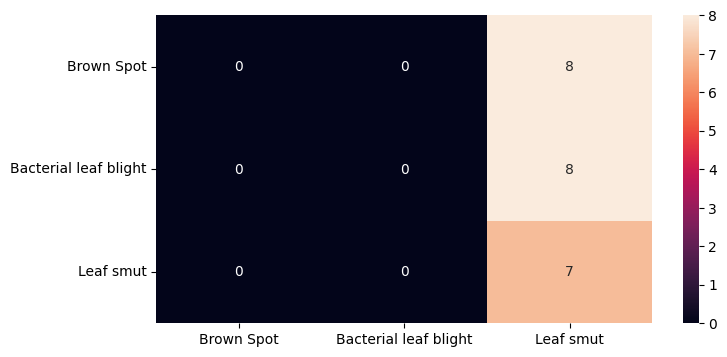

In [ ]:
# Visualize Confusion matrix

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix,annot=True,xticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'],
            yticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'])

In [ ]:
# accuracy score
accuracy_score1 = accuracy_score(y_val,y_predict_class1)
print('accuracy score %.4f%%'% accuracy_score1)

accuracy score 0.3043%


In [ ]:
# classification report

print(classification_report(y_val,y_predict_class1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8
           2       0.30      1.00      0.47         7

    accuracy                           0.30        23
   macro avg       0.10      0.33      0.16        23
weighted avg       0.09      0.30      0.14        23



## Evaluation Summary

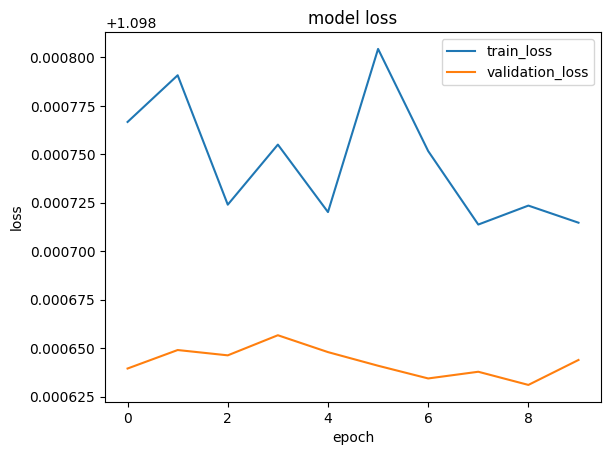

In [ ]:
# summary history of loss
plt.plot(history1.history['loss'],label='train_loss')
plt.plot(history1.history['val_loss'],label='validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

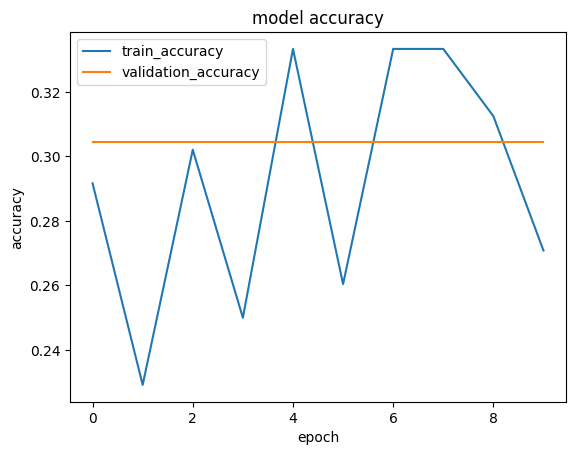

In [ ]:
# summary history of accuracy
plt.plot(history1.history['accuracy'],label='train_accuracy')
plt.plot(history1.history['val_accuracy'],label='validation_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# check if my model predict disease from provided image

from tensorflow.keras.preprocessing.image import load_img,img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
input_image = load_img('/content/drive/MyDrive/Internship phase 3 CDS certification/Projects/Rice Leaf Disease using CNN/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0378.JPG',target_size=(224,224,3))

input_image_arr = img_to_array(input_image)

input_image_arr_ex = tf.expand_dims(input_image_arr,0)

prediction = model1.predict(input_image_arr_ex)

class_labels = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

class_labels[np.argmax(prediction)]


1/1 [==============================] - 0s 59ms/step


'Leaf smut'

## Save trained model so that we do not need to run repeatedly

In [ ]:
# To use my train model later without re-train

import pickle

with open('trained_model_01.pkl','wb') as trained_model_01:
  pickle.dump(model1,trained_model_01)

In [ ]:
# re open my last trained model

with open('/content/drive/MyDrive/Internship phase 3 CDS certification/Projects/Rice Leaf Disease using CNN/trained_model_01 (1).pkl','rb') as trained_model_01:
  loaded_model_01 = pickle.load(trained_model_01)

## Creating model2

In [ ]:
# Import libraries

from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# Load pretrained Xception model

base_model = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224,224,3), pooling=None, classes=1000, classifier_activation='softmax')

In [ ]:
# Freeze all layers in the base model

for layer in base_model.layers:
  layer.trainable = False

In [ ]:
#Flattening the output

x = Flatten()(base_model.output)

In [ ]:
# Getting prediction

predictions = Dense(3,activation='softmax')(x)

In [ ]:
# Creating model

from tensorflow.keras.models import Model

model2 = Model(inputs=base_model.input,outputs = predictions)
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
# Complie the model

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history2 = model2.fit(train_dataset,epochs=10,validation_data=validation_dataset,callbacks=early_stopping,verbose=1)

Epoch 1/10
5/5 [==============================] - 40s 8s/step - loss: 2.3390 - accuracy: 0.5521 - val_loss: 3.1563 - val_accuracy: 0.5652
Epoch 2/10
5/5 [==============================] - 37s 8s/step - loss: 1.8698 - accuracy: 0.6875 - val_loss: 1.2056 - val_accuracy: 0.7391
Epoch 3/10
5/5 [==============================] - 28s 6s/step - loss: 1.6318 - accuracy: 0.7812 - val_loss: 1.4276 - val_accuracy: 0.8261
Epoch 4/10
5/5 [==============================] - 28s 6s/step - loss: 1.2629 - accuracy: 0.7500 - val_loss: 0.2074 - val_accuracy: 0.9565
Epoch 5/10
5/5 [==============================] - 27s 6s/step - loss: 0.9611 - accuracy: 0.8333 - val_loss: 1.7510 - val_accuracy: 0.6957
Epoch 6/10
5/5 [==============================] - 32s 7s/step - loss: 0.9054 - accuracy: 0.8333 - val_loss: 2.9721 - val_accuracy: 0.6522
Epoch 7/10
5/5 [==============================] - 28s 5s/step - loss: 1.0980 - accuracy: 0.8542 - val_loss: 0.9464 - val_accuracy: 0.8696
Epoch 8/10
5/5 [==================

## Model2 Evaluation

In [ ]:
validation_loss2,Validation_accuracy2 = model2.evaluate(validation_dataset)

print('validation_loss2 :',validation_loss2)
print('Validation_accuracy2 :',Validation_accuracy2)

2/2 [==============================] - 5s 974ms/step - loss: 1.7041 - accuracy: 0.8696
validation_loss2 : 1.7040643692016602
Validation_accuracy2 : 0.8695651888847351


In [ ]:
# Predictions using the pre-trained CNN model

y_predict2 = model2.predict(validation_dataset)

2/2 [==============================] - 8s 524ms/step


In [ ]:
# Get the predicted class label

y_predict_class2 = y_predict2.argmax(axis=1)
y_predict_class2

array([2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2,
       2])

In [ ]:
# Get labels from validation dataset
y_val=validation_dataset.labels
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
#importing the classification metrics

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
#confusion matrix
confusion_matrix=confusion_matrix(y_val,y_predict_class2)
print(confusion_matrix)

[[2 0 6]
 [4 2 2]
 [2 1 4]]


<Axes: >

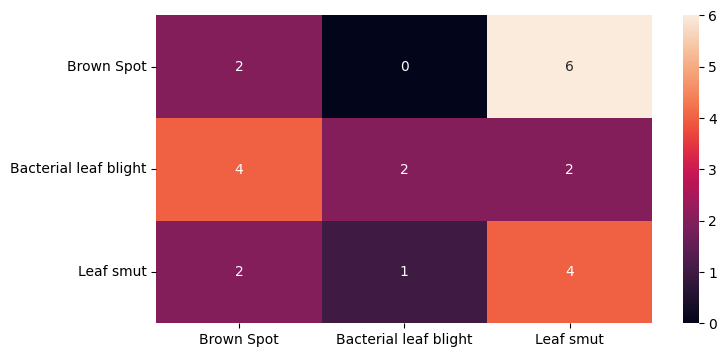

In [ ]:
# Visualize Confusion matrix

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix,annot=True,xticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'],
            yticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'])

In [ ]:
# accuracy score
accuracy_score2 = accuracy_score(y_val, y_predict_class2)
print(accuracy_score2)

0.34782608695652173


In [ ]:
# classification report

print(classification_report(y_val,y_predict_class2))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.67      0.25      0.36         8
           2       0.33      0.57      0.42         7

    accuracy                           0.35        23
   macro avg       0.42      0.36      0.34        23
weighted avg       0.42      0.35      0.34        23



## Evaluation Summary

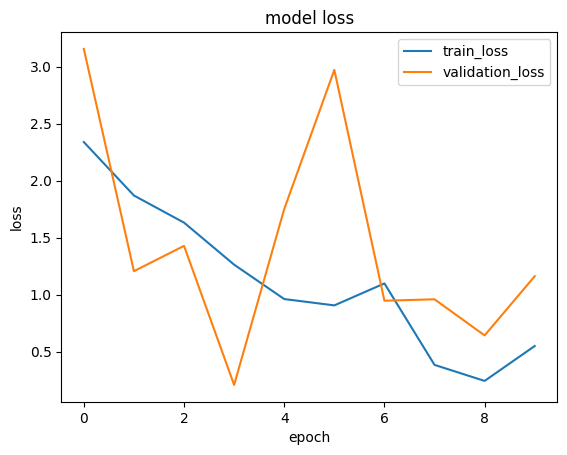

In [ ]:
# summary history of loss
plt.plot(history2.history['loss'],label='train_loss')
plt.plot(history2.history['val_loss'],label='validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

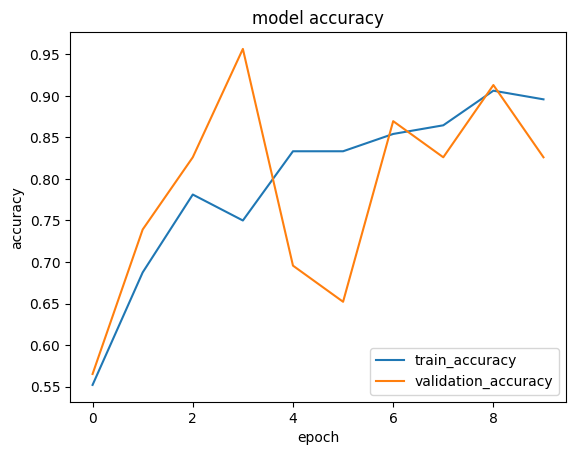

In [ ]:
# summary history of accuracy
plt.plot(history2.history['accuracy'],label='train_accuracy')
plt.plot(history2.history['val_accuracy'],label='validation_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# check if my model predict disease from provided image

from tensorflow.keras.preprocessing.image import load_img,img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
input_image = load_img('/content/drive/MyDrive/Internship phase 3 CDS certification/Projects/Rice Leaf Disease using CNN/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0378.JPG',target_size=(224,224,3))

input_image_arr = img_to_array(input_image)

input_image_arr_ex = tf.expand_dims(input_image_arr,0)

prediction = model2.predict(input_image_arr_ex)

class_labels = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

class_labels[np.argmax(prediction)]


1/1 [==============================] - 2s 2s/step


'Brown spot'

## Save trained model so that we do not need to run repeatedly

In [ ]:
# To use my train model later without re-train

import pickle

with open('trained_model_02.pkl','wb') as trained_model_02:
  pickle.dump(model2,trained_model_02)

In [ ]:
# re open my last trained model

with open('/content/drive/MyDrive/Internship phase 3 CDS certification/Projects/Rice Leaf Disease using CNN/PRCP-1001-RiceLeaf/trained_model_02.pkl','rb') as trained_model_02:
  loaded_model_02 = pickle.load(trained_model_02)

## Creating Model3

In [ ]:
# import libraries
from tensorflow.keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D,Activation,Dropout,Flatten,Dense,Input,Layer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model,Sequential


In [ ]:
# Load pretrained Xception model

vgg16_model = VGG16(include_top = False, input_shape = (224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze all layers in the base model

for layer in vgg16_model.layers:
  layer.trainable = False

In [ ]:
# Creating input & output layer

input_layer = Input(shape=(224,224,3))
x = vgg16_model(input_layer)
output = GlobalAveragePooling2D()(x)

In [ ]:
# Predictions

predictions = Dense(3,activation='softmax')(output)

In [ ]:
# Creating model

from tensorflow.keras.models import Model

model3 = Model(inputs = input_layer, outputs = predictions)
model3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Complie the model

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Training model
history3 = model3.fit(train_dataset,epochs=10,validation_data=validation_dataset,callbacks=early_stopping,verbose=1)

Epoch 1/10
5/5 [==============================] - 79s 16s/step - loss: 1.3745 - accuracy: 0.3542 - val_loss: 1.2810 - val_accuracy: 0.4783
Epoch 2/10
5/5 [==============================] - 77s 16s/step - loss: 1.2499 - accuracy: 0.3438 - val_loss: 1.1478 - val_accuracy: 0.5652
Epoch 3/10
5/5 [==============================] - 76s 16s/step - loss: 1.1597 - accuracy: 0.3125 - val_loss: 1.1161 - val_accuracy: 0.3913
Epoch 4/10
5/5 [==============================] - 76s 16s/step - loss: 1.1282 - accuracy: 0.3646 - val_loss: 1.0953 - val_accuracy: 0.2609
Epoch 5/10
5/5 [==============================] - 76s 16s/step - loss: 1.0910 - accuracy: 0.3646 - val_loss: 1.0778 - val_accuracy: 0.3478
Epoch 6/10
5/5 [==============================] - 69s 14s/step - loss: 1.0824 - accuracy: 0.3646 - val_loss: 1.0598 - val_accuracy: 0.5652
Epoch 7/10
5/5 [==============================] - 71s 15s/step - loss: 1.0844 - accuracy: 0.3854 - val_loss: 1.0312 - val_accuracy: 0.4783
Epoch 8/10
5/5 [===========

## Model3 Evaluation

In [ ]:
validation_loss3,Validation_accuracy3 = model3.evaluate(validation_dataset)

print('validation_loss3 :',validation_loss3)
print('Validation_accuracy3 :',Validation_accuracy3)

2/2 [==============================] - 14s 1s/step - loss: 1.0450 - accuracy: 0.3913
validation_loss3 : 1.0449650287628174
Validation_accuracy3 : 0.3913043439388275


In [ ]:
# Predictions using the pre-trained CNN model

y_predict3 = model3.predict(validation_dataset)

2/2 [==============================] - 13s 2s/step


In [ ]:
# Get the predicted class label

y_predict_class3 = y_predict3.argmax(axis=1)
y_predict_class3

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2,
       1])

In [ ]:
# Get labels from validation dataset
y_val=validation_dataset.labels
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
#importing the classification metrics

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
#confusion matrix
confusion_matrix=confusion_matrix(y_val,y_predict_class3)
print(confusion_matrix)

[[2 6 0]
 [3 3 2]
 [1 4 2]]


<Axes: >

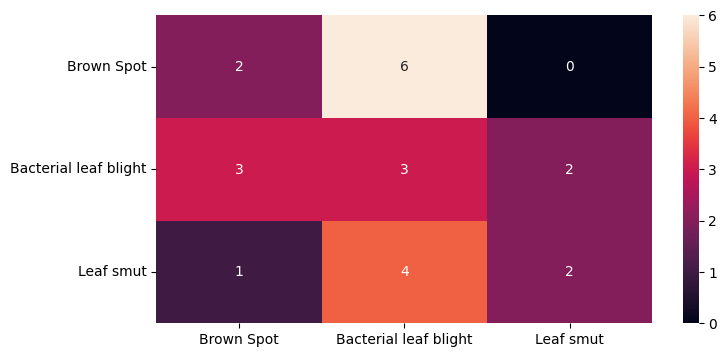

In [ ]:
# Visualize Confusion matrix

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix,annot=True,xticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'],
            yticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'])

In [ ]:
# accuracy score
accuracy_score3 = accuracy_score(y_val, y_predict_class3)
print(accuracy_score3)

0.30434782608695654


In [ ]:
# classification report

print(classification_report(y_val,y_predict_class3))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.23      0.38      0.29         8
           2       0.50      0.29      0.36         7

    accuracy                           0.30        23
   macro avg       0.35      0.30      0.31        23
weighted avg       0.35      0.30      0.31        23



## Evaluation Summary

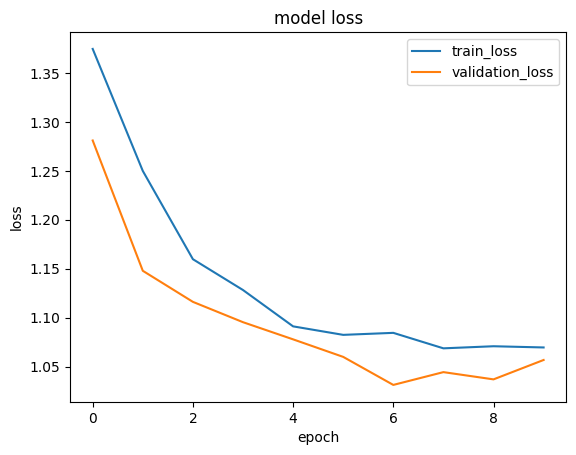

In [ ]:
# summary history of loss
plt.plot(history3.history['loss'],label='train_loss')
plt.plot(history3.history['val_loss'],label='validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

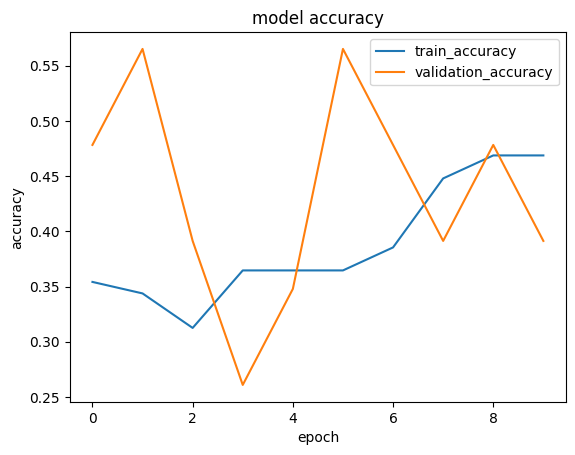

In [ ]:
# summary history of accuracy
plt.plot(history3.history['accuracy'],label='train_accuracy')
plt.plot(history3.history['val_accuracy'],label='validation_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# check if my model predict disease from provided image

from tensorflow.keras.preprocessing.image import load_img,img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
input_image = load_img('/content/drive/MyDrive/Internship phase 3 CDS certification/Projects/Rice Leaf Disease using CNN/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight/DSC_0378.JPG',target_size=(224,224,3))

input_image_arr = img_to_array(input_image)

input_image_arr_ex = tf.expand_dims(input_image_arr,0)

prediction = model3.predict(input_image_arr_ex)

class_labels = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

class_labels[np.argmax(prediction)]


1/1 [==============================] - 1s 611ms/step


'Bacterial leaf blight'

## Save trained model so that we do not need to run repeatedly

In [ ]:
# To use my train model later without re-train

import pickle

with open('trained_model_03.pkl','wb') as trained_model_03:
  pickle.dump(model3,trained_model_03)

In [ ]:
# re open my last trained model

with open('/content/drive/MyDrive/Internship phase 3 CDS certification/Projects/Rice Leaf Disease using CNN/PRCP-1001-RiceLeaf/trained_model_03.pkl','rb') as trained_model_03:
  loaded_model_03 = pickle.load(trained_model_03)

## Conclusion:
  
  We have experimented with 3 different CNN architecture , found best result for Xception Transfer Learning Model and It performed well in classification of our data. We observed that using transfer learning technique we are able to get good results within less number of epochs and with less time.
    